/Users/liwei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


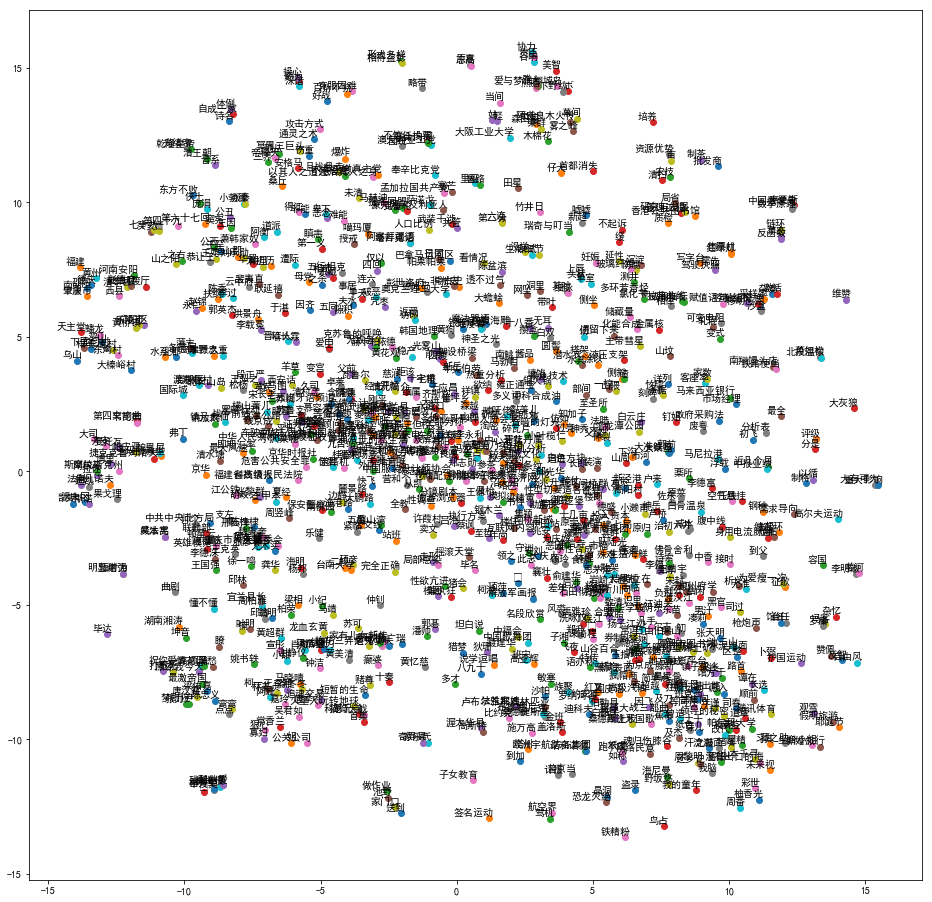

In [2]:
from gensim.models import Word2Vec
from random import sample
from pylab import mpl
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
model = Word2Vec.load('./word_vectors_100')
#载入模型，这个模型中的词向量是100维的，模型文件放在当前目录
words = list(model.wv.vocab)
#把所有词向量的词语装到列表中
labels = sample(words, 1000) #随机取出1000个词语用来画图
tokens = model[labels] #得到1000个词语的词向量

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
#降维处理
mpl.rcParams['font.sans-serif'] = ['SimHei'] #中文字体
mpl.rcParams['axes.unicode_minus'] = False #防止负号出现异常显示
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) #定义画布大小
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()